In [1]:
!pip install -Uqq fastbook
import fastbook


     |████████████████████████████████| 720 kB 4.7 MB/s 
     |████████████████████████████████| 189 kB 52.2 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 1.2 MB 60.2 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 51 kB 354 kB/s 


In [2]:
from fastbook import * 
fastbook.setup_book()

Mounted at /content/gdrive


## First Classifier 

Download un dataset contenant des images de chien et de chat 

1.   DL un dataset contenant des images de chien et de chat 
2.   Un model pre-entrainé avec plusieurs millions d'image est dl 
3.   le model est ensuite affiné pour le spécialisé dans la comparaison d'image de chien ou de chat 




In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.178006,0.018986,0.006089,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.053489,0.010229,0.005413,00:58


Upload d'une image a utilisé pour la comparaison

In [5]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

le model determine si l'image upload est celle d'un chat 

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat ?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat ?: True.
Probability it's a cat: 1.000000


Modelisation de l'entrainement d'un model 

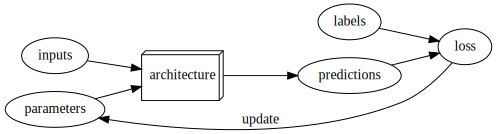

In [13]:
gv('''ordering=in model[shape=box3d width=1 height=0.7 label=architecture] inputs->model->predictions; parameters->model; labels->loss; predictions->loss loss->parameters[constraint=false label=update]''')

Resulats 

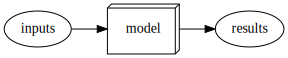

In [14]:
gv('''model[shape=box3d width=1 height=0.7] inputs->model->results''')

## Comment la reconnaissance de l'image fonctionne 

In [15]:
from fastai.vision.all import *

Importation de tous les fonctions et classes nécessaire pour la creation d'une grande variete de models de reconnaissance d'image

In [16]:
path = untar_data(URLs.PETS)/'images'

Importation du dataset d'images 

In [17]:
def is_cat(x): return x[0].isupper()

Cretion d'une fonction qui retourn les lables. ces lables sont ecris dans le nom des fichier d'apres une regle imposé pour les createurs du dataset

In [18]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

Défini quel type(image) de dataset est utilisé et comment il est structuré

dernier param correspond au `Transform` utilisé. un `Transform` contient du code qui sera automatiquement utilisé pendant l'entrainement du model. il en existe 2 types : 

* item_tfms : qui sera appliqué a chaque objets (images). dans ce cas la, les images sont reduite a une resolution de 224x224.
* batch_tfms : qui sera applique sur un ensemble d'image en utilisant le GPU, ce qui permet une execution rapide du code 


Le parametre `valid_pct=0.2` permet de garder 20% des données et de ne pas les utiliser pour l'entrainement du model. c'est données constituent le `validation set`, le reste des données utilisé pour l'entrainement du model constituent le  `training set `. le set de validation est utilisé pour mesure la precision du model. 
Le taux de 20% est defini pour defaut 

Le parametre `seed` défini la valeur aléatoire a un nombre fixe(42) pour que le choix du set de validation sont identique a chaque lancement du programme
Ce qui permet de savoir que si le model est modifié puis re-entrainer, les différences seront dus aux modifications et non a l'utilisation d'un set de validation aléatoire.

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

creation d'un Convolutional Neutal Network (CNN) et spécifie quel architecture utilisé ( quel genre de model), quel données a utilisé pour l'entrainement et quel metrics a utilisé


l'architecture utlisé est apppele ResNet, le n°34 correspond au nombre de niveau utilisé pour l'entrainenemt(18, 50, 101 et 152 sont aussi possible) plus il y a de niveau dans une architecture plus le model est long a entrainer et plus il est possible d'overfit

un metric est une fonction qui mesure la qualité des predictions en utlisant le set de validation. error_rate est une fonction de FastAI qui afficher le pourcentage des images du set de validation qui ne sont pas correctement classifié.

In [ ]:
learn.fine_tune(1)

Determine comment `fit` le model 

Les architectures ne sont que des templates pour des fonctions mathématques. 

L'objectif est determiner comment mettre en forme les models pour qu'ils resolvent des problémes. 
Une des valeurs a determiner est au moins le nombre de d'iteration sur chaque images. c'est iterations sont appelé epochs. 
le nombre d'epochs choisi depend du temps disponible et combien de temps est nécessaire pour mettre en forme le model. 

### Deep Learning Is Not Just for Image Classification

localizing objects in a picture

In [20]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.979408,3.053257,00:02


epoch,train_loss,valid_loss,time
0,1.979267,1.638060,00:02
1,1.683392,1.450526,00:02
2,1.506624,1.307485,00:02
3,1.342698,1.027153,00:02
4,1.230256,1.030461,00:02
5,1.118356,0.814674,00:02
6,1.024510,0.812726,00:02
7,0.949761,0.790403,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


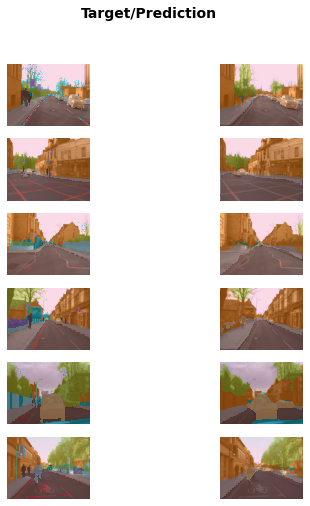

In [21]:
learn.show_results(max_n=6, figsize=(7,8))

natural language processing (NLP)

In [22]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464013,0.411691,0.818040,03:22


epoch,train_loss,valid_loss,accuracy,time
0,0.307812,0.266939,0.891720,07:01
1,0.245926,0.213949,0.916440,07:02
2,0.184287,0.206931,0.922960,07:03
3,0.154130,0.190106,0.928560,07:03


#Vocabulaire: 



*   The functional form of the model is called its architecture (but be careful—sometimes people use model as a synonym of architecture, so this can get confusing).
*   The weights are called parameters.
*   The predictions are calculated from the independent variable, which is the data not including the labels.
*   The results of the model are called predictions.
*   The measure of performance is called the loss.
*   The loss depends not only on the predictions, but also the correct labels (also known as targets or the dependent variable); e.g., "dog" or "cat."


Il existe 2 principaux types de models utilisé dans ce cours : 
* classification model qui essaye de predire une classe ou une catégories 
* regression model qui essaye de predire une ou plusieurs quantité numerique comme une temperature ou une localisation

FastAI montre toujours les précision du model en utilsant le set de validation mais jamais avec le set d'entrainement. c'est important par qu'un model va memoriser tous les labels au fil du temps.ce qui rend le model inutile puisque qu'il doit détermnier les labels sur des images inconnus.  

### un model doit fonctionner sur des données pas encore connu apres qu'il ai été entrainé 

Quand un model memorise le set de training et qu'il n'est plus capable de determier les lables, ça se nomme **overfitting**


`cnn_learner`a un parametre `pretrained`qui vaut True par défaut, ce qui permet d'utiliser un pretrained model qui aura ete entrainer par des experts pour reconnaitre des milliers de categories differents sur plus de 1.3 milions d'images 

L'utilisation courante d'un pretrained model permet d'avoir a disposition un model qui avant qu'on lui ai donné des données sera deja capable de faire des prodictions sur les bords, gradients ou sur la detection de couleurs par exemple. ce qui semble etre des capacité tres utile dans le deep learning. 

En utilisant l'optin `pretrained, `cnn_learner` enleve le dernier niveau puisqu'il est spécifiquement conçu pour un entrainement nouveau?. ce niveau est remplacé par un niveau contenant des weights aléatoires et approrié pour la dataset utilisé

Le dernier niveau d'un model est appelé `head `  


We just covered a lot of information so let's recap briefly, <<dljargon>> provides a handy vocabulary.

```asciidoc
[[dljargon]]
.Deep learning vocabulary
[options="header"]
|=====
| Term | Meaning
|Label | The data that we're trying to predict, such as "dog" or "cat"
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
|Model | The combination of the architecture with a particular set of parameters
|Parameters | The values in the model that change what task it can do, and are updated through model training
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
|Train | A synonym for _fit_
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
|Fine-tune | Update a pretrained model for a different task
|Epoch | One complete pass through the input data
|Loss | A measure of how good the model is, chosen to drive training via SGD
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
|Validation set | A set of data held out from training, used only for measuring how good the model is
|Training set | The data used for fitting the model; does not include any data from the validation set
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
|=====
```

help fastAI 

```
doc(<fonction>)

```